In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('음식+업종(한식,일식,+중식,+양식,+패스트푸드점)+카드소비트렌드+데이터_1901_2109.csv', encoding = 'cp949')

기준년도/
업종명/
성별/
연령대구분명/
이용 건수/
이용 금액


In [5]:
df.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,한식,1,1,7,2.392000e+05
1,201901,한식,1,10,1618,4.671496e+07
2,201901,한식,1,20,150194,4.961334e+09
3,201901,한식,1,30,564787,2.006319e+10
4,201901,한식,1,40,817438,2.954471e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          3781 non-null   int64  
 1   tco_btc_nm    3781 non-null   object 
 2   ma_fem_dc     3781 non-null   int64  
 3   agegrp_dc     3781 non-null   int64  
 4   tco_btc_u_ct  3781 non-null   int64  
 5   tco_btc_u_am  3781 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 177.4+ KB


In [7]:
df['tco_btc_nm'].value_counts()

한식         659
패스트푸드점     644
중식         636
양식         629
일식         612
패밀리레스토랑    601
Name: tco_btc_nm, dtype: int64

In [48]:
#업종별 이용건수 합
df_tco = df.groupby('tco_btc_nm').agg(sum_ct = ('tco_btc_u_ct', 'sum'))
df_tco

,sum_ct
tco_btc_nm,
양식,11012773
일식,12947145
중식,23211802
패밀리레스토랑,3641159
패스트푸드점,36906620
한식,171930458


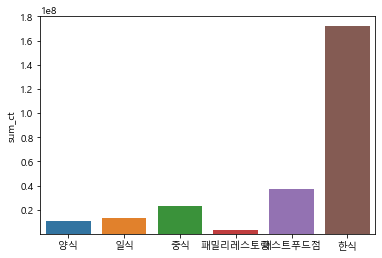

In [56]:
plt.ylim([200000,180000000])
sns.barplot(x = menu_list, y= df_tco['sum_ct'])
plt.show()

In [11]:
#20대 소비습관 확인
df_20 = df[df['agegrp_dc'] == 20]

In [12]:
df_20['tco_btc_nm'].value_counts()

한식         66
일식         66
중식         66
양식         66
패스트푸드점     66
패밀리레스토랑    66
Name: tco_btc_nm, dtype: int64

In [13]:
#20대 업종별 이용건수
df_20_ct = df_20.groupby('tco_btc_nm').agg(sum_ct = ('tco_btc_u_ct', 'sum'))
df_20_ct

,sum_ct
tco_btc_nm,
양식,1280531
일식,1335444
중식,1576365
패밀리레스토랑,254705
패스트푸드점,2911081
한식,11226411


In [19]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [23]:
a = df_20.groupby('tco_btc_nm').agg(sum_ct = ('tco_btc_u_ct', 'sum'))

In [39]:
menu_list= ['양식','일식','중식','패밀리레스토랑','패스트푸드점','한식']

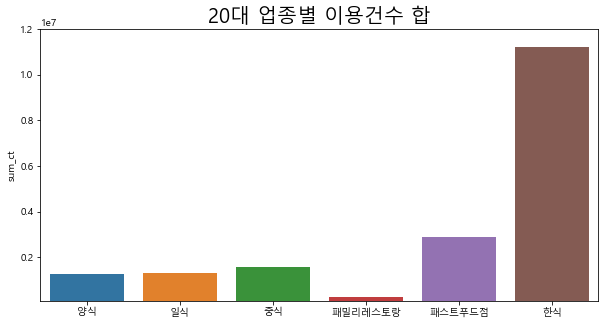

In [71]:
plt.figure(figsize=(10,5))
plt.title('20대 업종별 이용건수 합', size = 20)
plt.ylim([100000,12000000])
sns.barplot(x = menu_list, y= df_20_ct['sum_ct'])
plt.show()

In [43]:
colors = sns.color_palette('hls',len(menu_list))

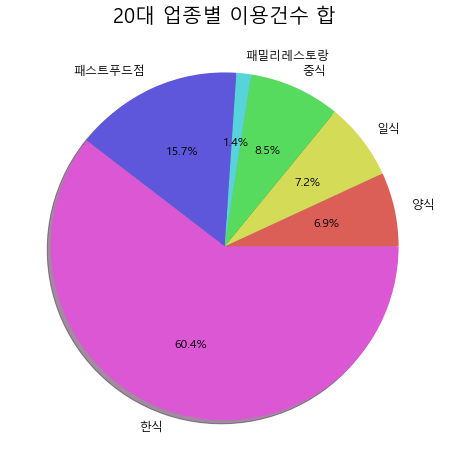

In [69]:
plt.figure(figsize = (13,8))
plt.title('20대 업종별 이용건수 합', size = 20)
plt.pie(df_20_ct['sum_ct'], labels=menu_list, autopct='%.1f%%',shadow = True, textprops = {'fontsize': 12},colors = colors)
plt.show()